In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import sys
from sklearn.metrics import precision_recall_fscore_support, accuracy_score,classification_report
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn import svm

# i will use lable decoder to transform the different gestures to 0,1,2
le = preprocessing.LabelEncoder()


# to read the file and get the data, I defined a function to get the data 
def r(file):
    selected = pd.read_csv(file)
 
    x = selected.iloc[:,6:7].values
    x1=[]
    for i in x:
        c = int(i[0][:-3])
        x1.append(c)


    return x1

        
# for cover gesture and create pandadata frames 
x11 = []
y1=[]
for i in range(1,31):
    x = r(f'p{i}.csv')
    
    x1 = x[:30]  
    x1.append('cover')
    x11.append(x1)
df = pd.DataFrame(x11, columns =['0','1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','Gesture'], dtype = float)

# for circle:
x22 = []
y2=[]
for i in range(1,31):
    a = r(f'h{i}.csv')
    x2 = a[:30]  
    x2.append('circle')
    x22.append(x2)
df2 = pd.DataFrame(x22, columns =['0','1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','Gesture'], dtype = float)

# for swipe:
x33 = []
y3=[]
for i in range(1,31):
    a = r(f'u{i}.csv')
    x3 = a[:30]  
    x3.append('Swipe')
    x33.append(x3)
df3 = pd.DataFrame(x33, columns =['0','1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','Gesture'], dtype = float)

# I then combined all the data to one dataframe 
result = df.append(df2, ignore_index=True)

final = result.append(df3,ignore_index =True)

# export training and test datasets to csv
training = final[:72]
test = final[72:]
training.to_csv('training.csv')
test.to_csv('test.csv')

# since i have the file, i will directly use the overall file from 'final',select the data and transform the lable to 0,1,2 by encoding 
x= final.iloc[:,:-1]
y= final.loc[:,'Gesture']
y =le.fit(y)

x= final.iloc[:,:-1]
y= final.loc[:,'Gesture']
yenc = le.transform(y)
final['Gesture']=yenc

x= final.iloc[:,:-1]
y= final.loc[:,'Gesture']


# I used the MinMaxScaler to standardesed the data, then split the data to 80% of training and 20% of test data
x1 = x.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1)
sdx = pd.DataFrame(x_scaled)
trainx,testx,trainy,testy = train_test_split(sdx,y,train_size = 0.8)

trainx1 = trainx.values

#Create a svm Classifier
clf = svm.SVC(kernel='linear') 
clf.fit(trainx,trainy)

#Predict the response for test dataset
predicty = clf.predict(testx)
print(classification_report(testy,predicty))



              precision    recall  f1-score   support

           0       0.55      1.00      0.71         6
           1       1.00      0.62      0.77         8
           2       1.00      0.50      0.67         4

    accuracy                           0.72        18
   macro avg       0.85      0.71      0.71        18
weighted avg       0.85      0.72      0.73        18



In [13]:
#print out the Prediction for test dataset
print(predicty)

[2 1 0 2 1 0 1 0 0 0 0 0 0 0 1 0 0 1]


<ipython-input-10-5f72e1a2e597>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = c
C:\Users\jiaji\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


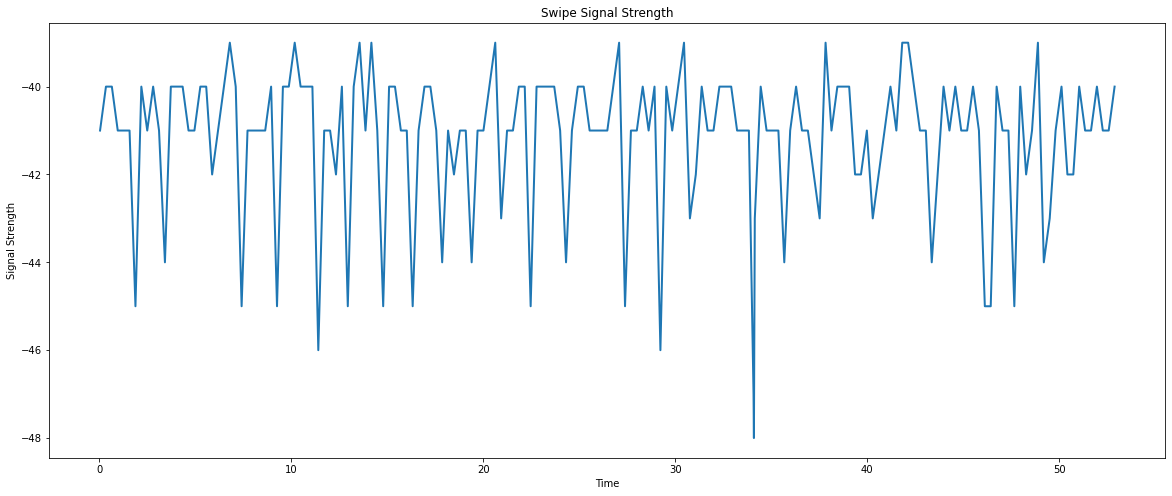

<ipython-input-10-5f72e1a2e597>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = c
C:\Users\jiaji\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


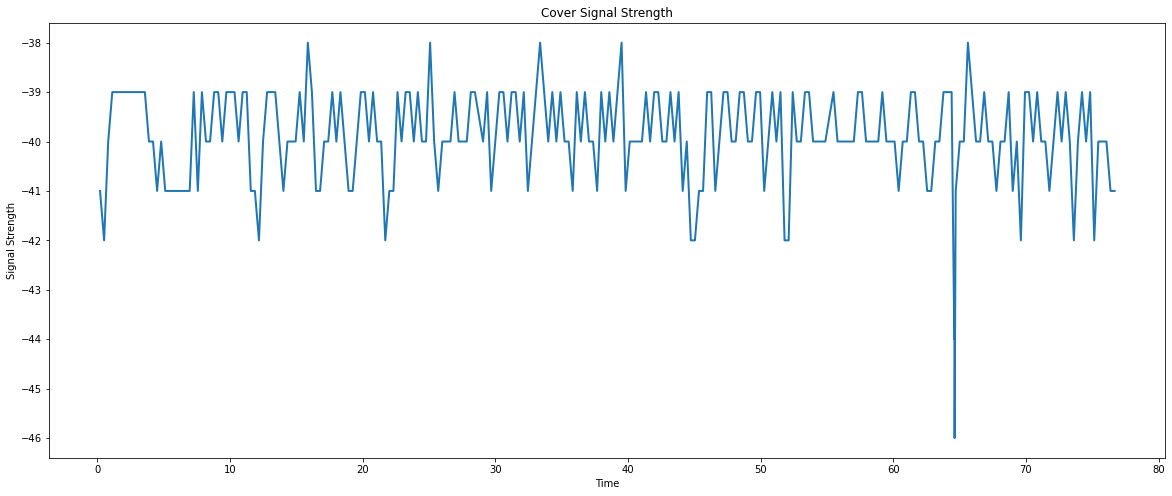

<ipython-input-10-5f72e1a2e597>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = c
C:\Users\jiaji\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


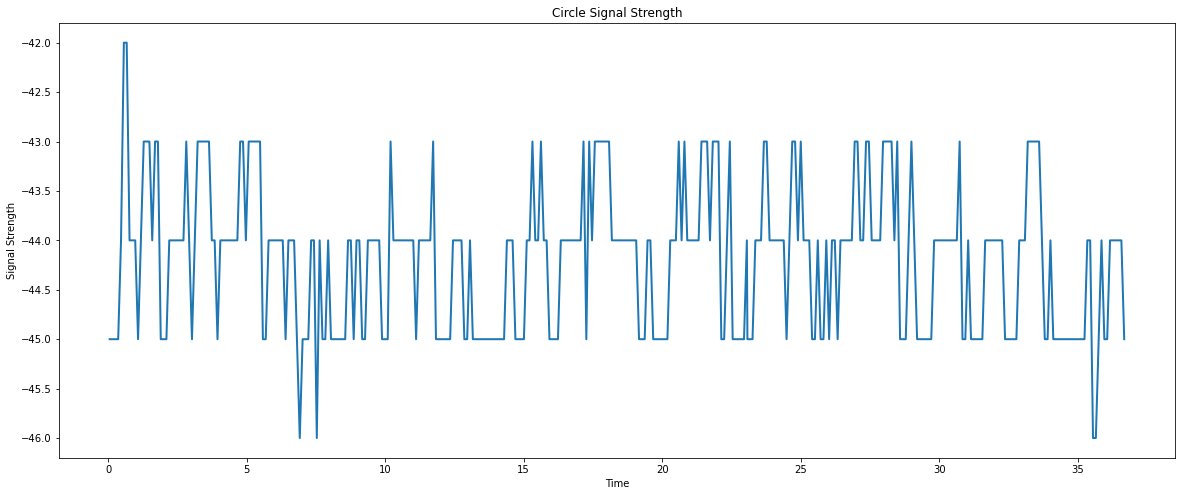

In [10]:
# to demonstrate and visualise the data, i visualised the RSS change over gestures from one file, where i collected 
# the rss over 30 times of each gestures movement 

# for swipe 
swipe = pd.read_csv('30swipe.csv')
selected = swipe[['Time','Signal strength (dBm)']]
x = selected['Signal strength (dBm)']
for i in range(0,len(x)):
    c = int(x[i][:-3])
    x[i] = c
plt.figure(figsize=(20, 8))

plt.title('Swipe Signal Strength')
plt.xlabel('Time')
plt.ylabel('Signal Strength')
x= selected['Time']
y = selected['Signal strength (dBm)']
plt.plot(x, y,linewidth=2)
plt.show()


# for cover
cover = pd.read_csv('30cover.csv')
selected = cover[['Time','Signal strength (dBm)']]
x = selected['Signal strength (dBm)']
for i in range(0,len(x)):
    c = int(x[i][:-3])
    x[i] = c
plt.figure(figsize=(20, 8))

plt.title('Cover Signal Strength')
plt.xlabel('Time')
plt.ylabel('Signal Strength')
x= selected['Time']
y = selected['Signal strength (dBm)']
plt.plot(x, y,linewidth=2)
plt.show()


# for circle 
circle = pd.read_csv('30circle.csv')
selected = circle[['Time','Signal strength (dBm)']]
x = selected['Signal strength (dBm)']
for i in range(0,len(x)):
    c = int(x[i][:-3])
    x[i] = c
plt.figure(figsize=(20, 8))

plt.title('Circle Signal Strength')
plt.xlabel('Time')
plt.ylabel('Signal Strength')
x= selected['Time']
y = selected['Signal strength (dBm)']
plt.plot(x, y,linewidth=2)
plt.show()
